## Assignment 3

In [125]:
import pandas as pd
import numpy as np

Reading the csv

Removing records with year acquired, year constructed and square footage values as 0.

In [126]:
buildings = pd.read_csv('building_inventory.csv', na_values = {
    'Year Acquired' : 0, 
    'Year Constructed': 0,
    'Square Footage': 0} )

In [127]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,432.0,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,NaN,NaN,330.0,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,NaN,1987.0,130.0,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971.0,1971.0,49552.0,1,1,0,Education,Education,Not provided


### Q1. Relationship between the year acquired and the year constructed

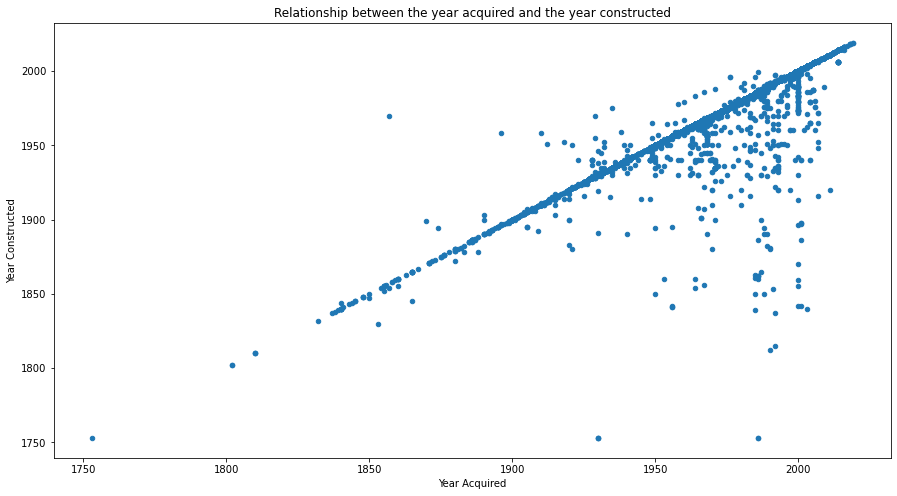

In [128]:
ax = buildings.plot(x = "Year Acquired", y = "Year Constructed", kind='scatter',  figsize=(15,8), 
                    title = 'Relationship between the year acquired and the year constructed')

The relationship between Year Acquired and Year Constructed is as above. We can observe that most of the buildings were constructed before they were acquired. A large proprotion of the buildings were acquired after 1920. A small portion of the buildings were constructed after the land for it was acquired.

This relationship in this particular visualization can be comprehended better as a scatterplot. The same is not true when line plot was used. 

### Q2. Total square footage as a function of building status ("Bldg Status")

Finding out the unique values in the column 'Bldg Status'.

In [129]:
buildings["Bldg Status"].unique() 

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

Calculating the total sum of square footage for the unique values obtianed from the 'Bldg Status' column.

In [130]:
aggregated_data = buildings.groupby("Bldg Status")["Square Footage"].sum()
aggregated_data

Bldg Status
Abandon         2048290.0
In Progress     2314558.0
In Use         97337698.0
Name: Square Footage, dtype: float64

<AxesSubplot:title={'center':'Total square footage as a function of building status ("Bldg Status")'}, xlabel='Building Status', ylabel='Total square footage'>

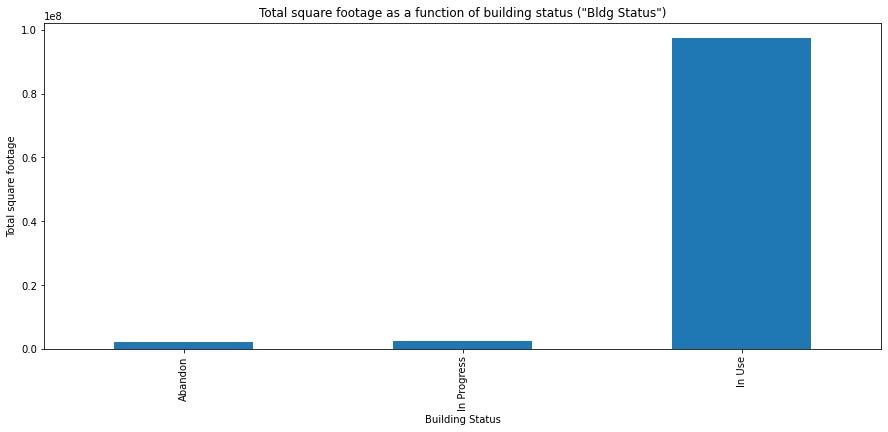

In [137]:
aggregated_data.plot.bar(figsize=(15,6), xlabel = 'Building Status', ylabel = 'Total square footage', 
                         title = 'Total square footage as a function of building status ("Bldg Status")')

We calculate the total sum of square footage of all unique values within 'Bldg Status'. The result is 'Abandon' : 2048290, 'In Progress' : 2314558, 'In Use' : 97337698.

Plotting these values using bar plot, we get the above result.  

I tried to add the labels to individual bars to represent the label values ('Abandon' : 2048290, 'In Progress' : 2314558, 'In Use' : 97337698), but it didn't seemed to work. 

### Q4. Square footage for the five most common departments (aka "Agency Name") as a function of year.  Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.

We find the top 5 departments based on the number of occurences in the table.

In [132]:
top_5 = buildings['Agency Name'].value_counts().head(5)
top_5

Department of Natural Resources    3223
Department of Corrections          1428
Department of Transportation       1137
Department of Human Services        617
University of Illinois              525
Name: Agency Name, dtype: int64

We obtain Department of Natural Resources, Department of Corrections, Department of Transportation, Department of Human Services, University of Illinois as the top 5 departments based on the number of occurences in the table.

Now, we try to calculate the total sum of square footage of these top 5 departments as a function of 'year aquired'. We chose 'year acquired' because according to our interpretation, the buildings became a part of the university after it got acquired. So, in general, we are trying to find the total square footage of the top 5 departments that had acquired buildings.

We drop the records with NaN values to showcase a better visualization .

In [133]:
top_5_df = buildings[buildings['Agency Name'].isin(top_5.index.tolist())]
top_5_df = top_5_df.dropna()
top_5_df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,Department of Transportation,Morton Maintenance Storage Facility - Tazewell...,1971 N. Morton Avenue,Morton,61550,Tazewell,18,Darin M. LaHood,88,Sommer Keith P.,...,In Use,1990.0,1990.0,512.0,1,0,1,Storage,Storage,Not provided
8738,Department of Transportation,Morton Maintenance Storage Facility - Tazewell...,1971 N. Morton Avenue,Morton,61550,Tazewell,18,Darin M. LaHood,88,Sommer Keith P.,...,In Use,2011.0,2011.0,388.0,1,0,1,Storage,Storage,Not provided
8739,Department of Transportation,Mt. Carroll Maintenance Storage Facility - Car...,700 E. Norris Drive,Ottawa,61350,Carroll,17,Cheri Bustos,89,Stewart Brian W.,...,In Use,1999.0,1999.0,223.0,1,0,0,Storage,Utiility & Miscellan,Not provided
8743,Department of Transportation,Peoria Traffic Sign Shop,1025 W. Detweiller Drive,Peoria,61615,Peoria,18,Darin M. LaHood,73,Spain Ryan,...,In Use,2006.0,2006.0,25886.0,2,0,0,Business,Not provided,Not provided


In [134]:
plot_data = top_5_df.groupby("Year Acquired")["Square Footage"].sum()

We plot the total sum of square footage of the top 5 occuring departments in the table with respect to year acquired.

<AxesSubplot:title={'center':'Square footage for the five most common departments with respect to year acquired'}, xlabel='Year Acquired', ylabel='Total Square footage for the five most common departments '>

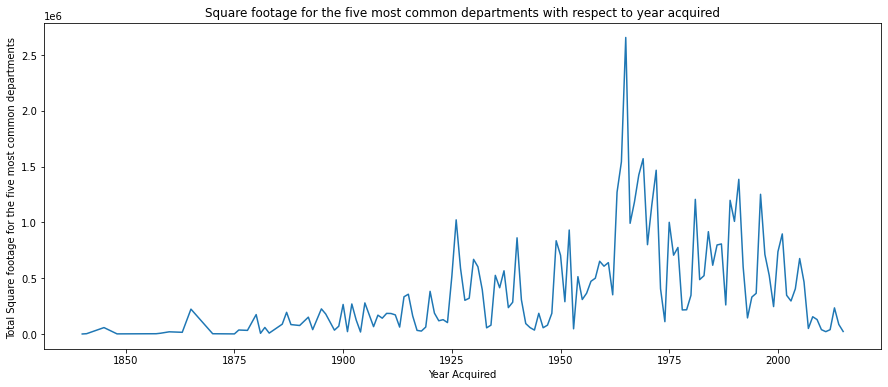

In [136]:
plot_data.plot(figsize=(15,6), ylabel = 'Total Square footage for the five most common departments ', 
                         title = 'Square footage for the five most common departments with respect to year acquired')

We can observe that the buildings acquired for the top 5 departments had highest total square footage from 1960 - 1970.
Total square footage for the top 5 departments with acquired builidngs has increased over the years.

The explaination for choosing Year Acquired/ Year Constructed is still ambiguous and not clear based on the data we have in the table. Assumptions have been made about the reasons of choosing them.

Source:
https://www.geeksforgeeks.org/python-pandas-dataframe-isin/